In [2]:
# Lab Assignment 01 (Solutions)
# The objective of this lab assignment is to explore a dataset that contains
# information from customers of a telephone company (data_lab_01.csv).
# In Part 01 (Exploring the dataset), we will introduce basic pandas operations
# (how to read a dataset, how to select rows and columns, how to sort, etc.).
# In Part 02 (Exploring the features), we will analyze the features in the dataset
# and try to determine which of these features are good indicators of customer
# churn (that is, loss of customers).

In [3]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# PART 01: EXPLORING THE DATASET

In [5]:
# TASK 01: load the dataset using pandas.read_csv
data = pd.read_csv('data_lab_01.csv')

In [6]:
# TASK 02: display the first five rows of the dataset using pandas.DataFrame.head
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number voice mail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
# TASK 03: display the first five rows and the first three columns of the
# data set using pandas.DataFrame.iloc
# HINT: pandas.DataFrame.iloc is used for indexing by number
data.iloc[0:5, 0:3]

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415


In [8]:
# TASK 04: display the first five rows and the first three columns of the
# data set using pandas.DataFrame.loc
# HINT: pandas.DataFrame.loc is used for indexing by name
data.loc[0:5, : 'Area code']

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510


In [9]:
# TASK 05: determine the dimensionality of the dataset using pandas.DataFrame.shape
data.shape

(3333, 20)

In [10]:
# QUESTION 01: how many observations and how many features does the dataset contain?
# ANSWER: 3333 observations, 20 features

In [11]:
# TASK 06: display more information about the dataset using pandas.DataFrame.info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                         3333 non-null object
Account length                3333 non-null int64
Area code                     3333 non-null int64
International plan            3333 non-null object
Voice mail plan               3333 non-null object
Number voice mail messages    3333 non-null int64
Total day minutes             3333 non-null float64
Total day calls               3333 non-null int64
Total day charge              3333 non-null float64
Total eve minutes             3333 non-null float64
Total eve calls               3333 non-null int64
Total eve charge              3333 non-null float64
Total night minutes           3333 non-null float64
Total night calls             3333 non-null int64
Total night charge            3333 non-null float64
Total intl minutes            3333 non-null float64
Total intl calls              3333 non-null int64
Total intl charge         

In [12]:
# QUESTION 02: what are the data types of the features? Are there any missing values?
# ANSWER: bool, float64, int64, and object. There are no missing values

In [13]:
# TASK 07: change the data type of the feature 'Churn' from bool to int64
# using pandas.DataFrame.astype
data['Churn'] = data['Churn'].astype('int64')

In [14]:
# TASK 08: change the values of the feature 'International plan' from Yes/No
# to True/False using pandas.Series.map
# HINT: you can also perform this task using pandas.DataFrame.replace
change_values = {'No' : False, 'Yes' : True}
data['International plan'] = data['International plan'].map(change_values)

In [15]:
# TASK 09: create a new numerical feature named 'Total charge' that contains
# the sum of the features 'Total day charge', 'Total eve charge', and
# 'Total night charge'
data['Total charge'] = data['Total day charge'] + data['Total eve charge'] + data['Total night charge']

In [16]:
# TASK 10: sort the dataset in descending order by the feature 'Total charge'
# using pandas.DataFrame.sort_values and display the first five rows
data.sort_values(by = 'Total charge', ascending = False).head()

,State,Account length,Area code,International plan,Voice mail plan,Number voice mail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total charge
985,NY,64,415,True,No,0,346.8,55,58.96,249.5,...,21.21,275.4,102,12.39,13.3,9,3.59,1,1,92.56
15,NY,161,415,False,No,0,332.9,67,56.59,317.8,...,27.01,160.6,128,7.23,5.4,9,1.46,4,1,90.83
365,CO,154,415,False,No,0,350.8,75,59.64,216.5,...,18.40,253.9,100,11.43,10.1,9,2.73,1,1,89.47
2629,NH,141,415,False,Yes,32,322.4,92,54.81,283.2,...,24.07,209.5,111,9.43,6.7,3,1.81,1,1,88.31
289,OK,89,510,False,No,0,303.9,95,51.66,260.9,...,22.18,312.1,89,14.04,5.3,3,1.43,1,1,87.88


In [17]:
# PART 02: EXPLORING THE FEATURES

In [18]:
# TASK 11: compute summary statistics for all numerical features using
# pandas.DataFrame.describe
data.describe()

,Account length,Area code,Number voice mail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total charge
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914,56.685173
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067,10.487816
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000,19.980000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000,49.590000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000,56.630000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000,63.650000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000,92.560000


In [19]:
# TASK 12: compute summary statistics for all non-numerical features using
# pandas.DataFrame.describe
# HINT: use parameter include
data.describe(include = ['object', 'bool'])

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,False,No
freq,106,3010,2411


In [20]:
# TASK 13: group the data by the 'Churn' feature and compute summary
# statistics for all numerical variables again
# HINT: use pandas.DataFrame.groupby
data.groupby('Churn')
data.describe(include = ['float', 'int'])

,Account length,Area code,Number voice mail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total charge
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914,56.685173
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067,10.487816
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000,19.980000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000,49.590000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000,56.630000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000,63.650000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000,92.560000


In [21]:
# TASK 14: compute the percentage of churned and non-churned customers using
# pandas.Series.value_counts
# HINT: use parameter normalize
data['Churn'].value_counts(normalize = True)

0    0.855086
1    0.144914
Name: Churn, dtype: float64

In [22]:
# QUESTION 03: what is the percentage of churned customers?
# ANSWER: 14.4914%

In [23]:
# TASK 15: compute the mean values of all numerical features
# for churned customers
data[data['Churn'] == 1].mean(numeric_only = True)

Account length                102.664596
Area code                     437.817805
International plan              0.283644
Number voice mail messages      5.115942
Total day minutes             206.914079
Total day calls               101.335404
Total day charge               35.175921
Total eve minutes             212.410145
Total eve calls               100.561077
Total eve charge               18.054969
Total night minutes           205.231677
Total night calls             100.399586
Total night charge              9.235528
Total intl minutes             10.700000
Total intl calls                4.163561
Total intl charge               2.889545
Customer service calls          2.229814
Churn                           1.000000
Total charge                   62.466418
dtype: float64

In [24]:
# QUESTION 04: what is the mean total charge for churned customers?
# ANSWER: 62.466418

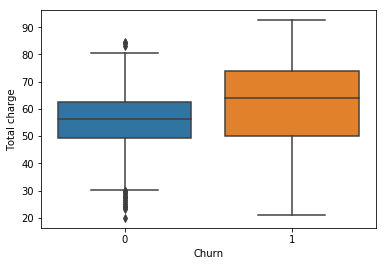

In [25]:
# TASK 16: visualize the summary statistics for the feature 'Total charge'
# using seaborn.boxplot
# HINT: use parameter x = 'Churn' to group customers by 'Churn'
sns.boxplot(x = 'Churn', y = 'Total charge', data = data)

In [26]:
# QUESTION 05: what do you observe in the plot?
# ANSWER: The churned customers have median total charge greater than
# the median total charge of non-churned customers

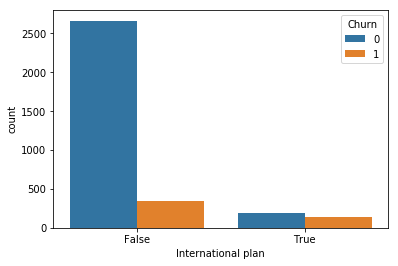

In [27]:
# TASK 17: visualize the number of customers in each category of the feature
# 'International plan' using seaborn.countplot
# HINT: use parameter hue to group customers by 'Churn'
sns.countplot(x = 'International plan', hue = 'Churn', data = data)

In [28]:
# QUESTION 06: what do you observe in the plot?
# ANSWER: Most people who do not have an international plan remain un-churned.

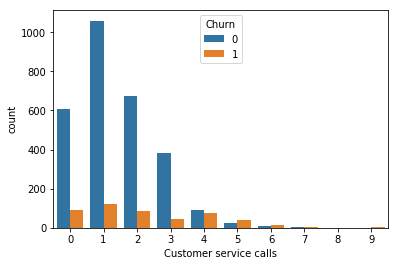

In [29]:
# TASK 18: visualize the number of customers in each category of the feature
# 'Customer service calls' using seaborn.countplot
# HINT: use parameter hue to group customers by 'Churn'
sns.countplot(x = 'Customer service calls', hue = 'Churn', data = data)

In [30]:
# QUESTION 07: what do you observe in the plot?
# ANSWER: Customers who remain un-churned make more customer 
# service calls than customers who churn.

In [33]:
# TASK 19: create a new boolean feature named 'Many customer service calls'
# that indicates whether a user has made more than 3 customer service calls
# and add it to the dataset
data['Many customer service calls'] = np.where(data['Customer service calls'] > 3, True, False)

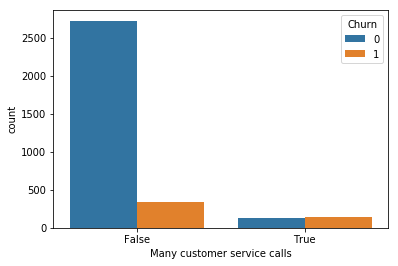

In [34]:
# TASK 20: visualize the number of customers in each category of the feature
# 'Many customer service calls' using seaborn.countplot
# HINT: use parameter hue to group customers by 'Churn'
sns.countplot( x = 'Many customer service calls', hue = 'Churn', data = data)

In [35]:
# QUESTION 08: what do you observe in the plot?
# ANSWER: Most customers who remain un-churned make less than 3 customer service calls.

In [36]:
# QUESTION 09: what are your final conclusions from the exploration of the
# features 'International plan' and 'Many customer service calls'?

# ANSWER: Customers who make customer service calls usually remain un-churned, but a customer who makes more than 
# 3 customer service calls is more likely to churn than a customer who does not make that many calls.
# This company's customer's seem to mainly be domestic, since most people who do not have an international
# plan do not churn. 

In [37]:
# QUESTION 10: what other tasks would you perform to explore this dataset?

# ANSWER: I would like to analyze the amount of customers from each state, in order to get a better picture
# of where most of this company's customers reside in. 
# I would also like to analyze how many people made international calls actually had an international plan, 
# in order to better understand why most of the company's customers are domestic.